In [1]:
pip install tifffile

     |████████████████████████████████| 133kB 4.7MB/s 
     |████████████████████████████████| 18.1MB 196kB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
directory = '/content/drive/My Drive/final'
path = directory + '/allbands.tif'

In [0]:
import tifffile as tiff

In [6]:
img = tiff.imread(path)
img.shape

(6610, 7001, 10)

In [0]:
import numpy as np

In [0]:
img[np.isnan(img)] = 0

In [0]:
crop = img[1500:4500, 2500:5500, :]

In [0]:
import matplotlib
import matplotlib.pyplot as plt

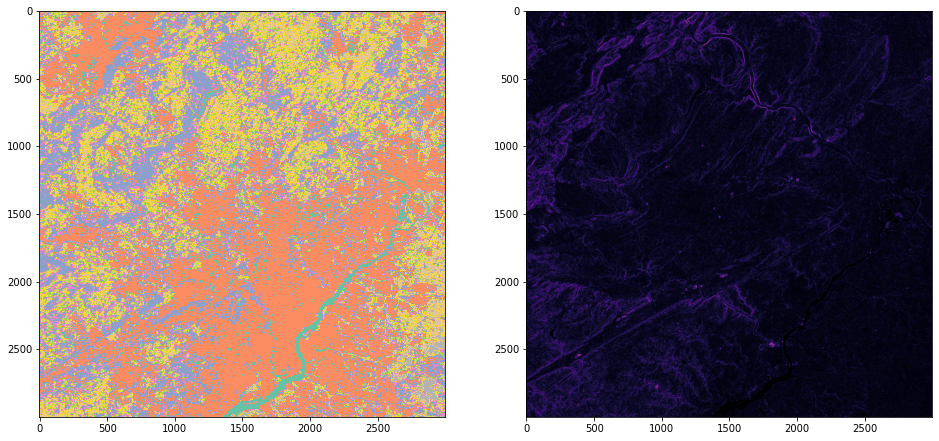

In [11]:
fig, axs = plt.subplots(1, 2, figsize = [16, 16])

axs[0].imshow(crop[:, :, 0], cmap = 'Set2')
axs[1].imshow(crop[:, :, 1], cmap = 'magma')

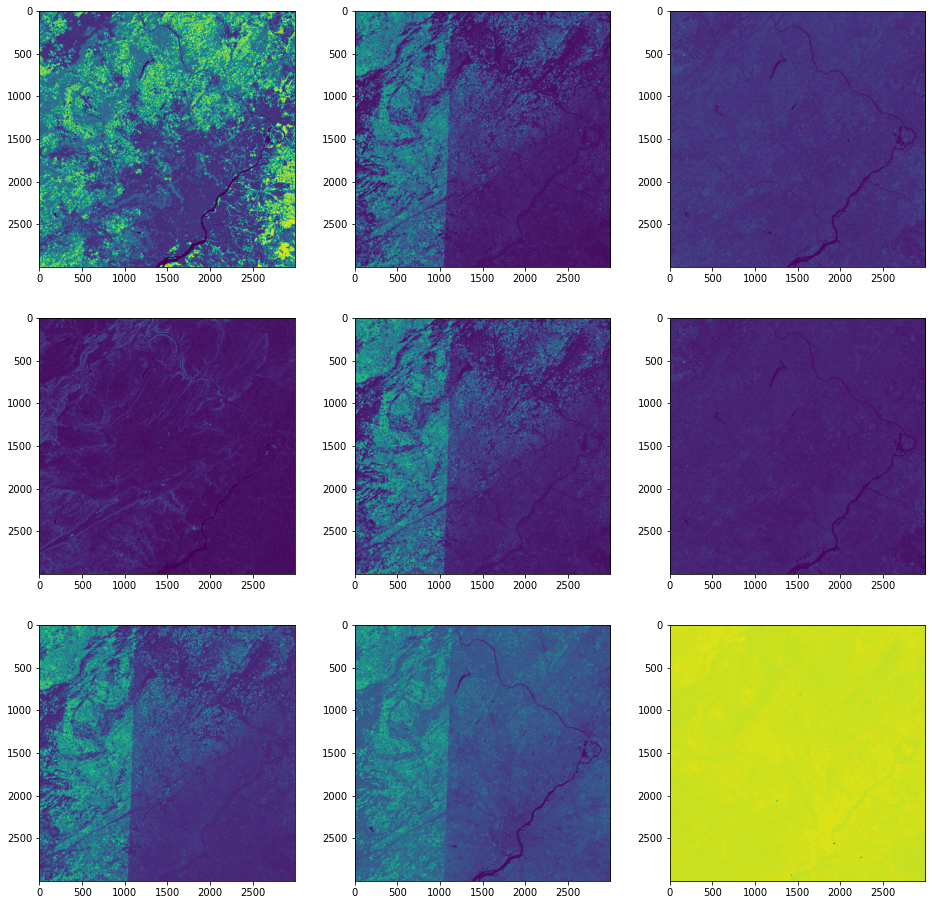

In [12]:
fig, axs = plt.subplots(3, 3, figsize = [16, 16])

for i in np.arange(0, 3):
    for j in np.arange(0, 3):
      slot = slot = i*3+j
      axs[j, i].imshow(crop[:,:, slot], cmap = 'viridis')
        
plt.show()

In [0]:
new = crop[0:500, 0:500, :]

In [14]:
resp = new[:, :, 0].flatten()

resp = resp * 100
resp = np.where((resp < 21) | (resp > 24), 0, resp)
resp = np.where((resp > 20) & (resp < 25), 1, resp)
print(resp.shape)

pred = np.zeros([resp.shape[0], 9])
print(pred.shape)

(250000,)
(250000, 9)


In [15]:
np.unique(resp)

array([0., 1.], dtype=float32)

In [0]:
from sklearn import preprocessing

In [0]:
for i in np.arange(0, pred.shape[1]):
  data = new[:, :, i + 1]
  scaler = preprocessing.StandardScaler().fit(data)
  scaled = scaler.transform(data)
  pred[:, i] = scaled.flatten()

In [0]:
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

from sklearn.utils import shuffle

In [0]:
indPos = np.where(resp == 1)[0]
indNeg = shuffle(np.where(resp == 0)[0], random_state = 42)[0:indPos.shape[0]]

indBal = shuffle(np.concatenate([indPos, indNeg]), random_state = 42)

XBal = pred[indBal, :]
YBal = resp[indBal]

X_train, X_test, y_train, y_test = train_test_split(pred, resp, stratify = resp, train_size = 0.6, random_state = 42)

In [20]:
print('Train size: ' + str(y_train.shape[0]))
svc = SVC(kernel = 'rbf')

print('Training the model ...')
svc.fit(X_train, y_train)

print('Applying the model ...')
yPred_1 = svc.predict(X_train)
yPred_2 = svc.predict(X_test)

print('Training accuracy: ' + str(100 * np.sum(yPred_1 == y_train) / y_train.shape[0]))
print('Testing accuracy: ' + str(100 * np.sum(yPred_2 == y_test) / y_test.shape[0]))

Train size: 150000
Training the model ...
Applying the model ...
Training accuracy: 80.936
Testing accuracy: 80.775
